In [10]:
import requests
import json
import pandas as pd
import os
import matplotlib.pyplot as plt

In [2]:
# my_api_key = '84ba481cbfcc1756941209469a7a8821'
my_api_key = '5be095e960395bbf5fc5c92d933db058'

In [3]:
RICs = pd.read_excel('RIC.xls', sheet_name=0)
RIC_list_0 = RICs['Unnamed: 1'].tolist()
RIC_list_0

[nan,
 nan,
 nan,
 nan,
 'RIC',
 '.SPCOMMS',
 'AMZN.O',
 'HD',
 'LOW',
 'TGT',
 'BKNG.O',
 'TJX',
 'DG',
 'ROST.O',
 'EBAY.O',
 'ORLY.O',
 'BBY',
 'DLTR.O',
 'AZO',
 'ETSY.O',
 'EXPE.O',
 'TIF',
 'ULTA.O',
 'KMX',
 'TSCO.O',
 'GPC',
 'POOL.O',
 'LKQ.O',
 'LB',
 'AAP',
 'RH',
 'WSM',
 'FIVE.O',
 'GPS',
 'LAD',
 'GRUB.K',
 'OLLI.O',
 'AN',
 'DKS',
 'KSS',
 'AAN',
 'JWN',
 'FL',
 'MUSA.K',
 'M',
 'STMP.O',
 'AEO',
 'URBN.O',
 'BBBY.O',
 'SSTK.K',
 'ABG',
 'GPI',
 'BIG',
 'RCII.O',
 'SNBR.O',
 'SAH',
 'SIG',
 'MNRO.O',
 'ODP.O',
 'MIK.O',
 'CORE.O',
 'ANF',
 'BKE',
 'SBH',
 'BOOT.K',
 'GES',
 'GME',
 'ZUMZ.O',
 'LL',
 'HIBB.O',
 'HZO',
 'CRMT.O',
 'PLCE.O',
 'DBI',
 'PETS.O',
 'SCVL.O',
 'HVT',
 'GCO',
 'CAL',
 'LQDT.O',
 'CONN.O',
 'KIRK.O',
 'CATO.K',
 'CHS',
 'BNED.K',
 'ASNA.OQ^H20',
 nan]

In [4]:
# Slice from "HD" to "ASNA"
# HD is the first, ASNA is the last
RIC_list_1 = RIC_list_0[RIC_list_0.index('HD'):-1]
RIC_list_1

['HD',
 'LOW',
 'TGT',
 'BKNG.O',
 'TJX',
 'DG',
 'ROST.O',
 'EBAY.O',
 'ORLY.O',
 'BBY',
 'DLTR.O',
 'AZO',
 'ETSY.O',
 'EXPE.O',
 'TIF',
 'ULTA.O',
 'KMX',
 'TSCO.O',
 'GPC',
 'POOL.O',
 'LKQ.O',
 'LB',
 'AAP',
 'RH',
 'WSM',
 'FIVE.O',
 'GPS',
 'LAD',
 'GRUB.K',
 'OLLI.O',
 'AN',
 'DKS',
 'KSS',
 'AAN',
 'JWN',
 'FL',
 'MUSA.K',
 'M',
 'STMP.O',
 'AEO',
 'URBN.O',
 'BBBY.O',
 'SSTK.K',
 'ABG',
 'GPI',
 'BIG',
 'RCII.O',
 'SNBR.O',
 'SAH',
 'SIG',
 'MNRO.O',
 'ODP.O',
 'MIK.O',
 'CORE.O',
 'ANF',
 'BKE',
 'SBH',
 'BOOT.K',
 'GES',
 'GME',
 'ZUMZ.O',
 'LL',
 'HIBB.O',
 'HZO',
 'CRMT.O',
 'PLCE.O',
 'DBI',
 'PETS.O',
 'SCVL.O',
 'HVT',
 'GCO',
 'CAL',
 'LQDT.O',
 'CONN.O',
 'KIRK.O',
 'CATO.K',
 'CHS',
 'BNED.K',
 'ASNA.OQ^H20']

In [5]:
# Remove the str after "."
company_list = []
for item in RIC_list_1:
    if "." in item:
        item = item[0:item.index(".")]
    company_list.append(item)
company_list

['HD',
 'LOW',
 'TGT',
 'BKNG',
 'TJX',
 'DG',
 'ROST',
 'EBAY',
 'ORLY',
 'BBY',
 'DLTR',
 'AZO',
 'ETSY',
 'EXPE',
 'TIF',
 'ULTA',
 'KMX',
 'TSCO',
 'GPC',
 'POOL',
 'LKQ',
 'LB',
 'AAP',
 'RH',
 'WSM',
 'FIVE',
 'GPS',
 'LAD',
 'GRUB',
 'OLLI',
 'AN',
 'DKS',
 'KSS',
 'AAN',
 'JWN',
 'FL',
 'MUSA',
 'M',
 'STMP',
 'AEO',
 'URBN',
 'BBBY',
 'SSTK',
 'ABG',
 'GPI',
 'BIG',
 'RCII',
 'SNBR',
 'SAH',
 'SIG',
 'MNRO',
 'ODP',
 'MIK',
 'CORE',
 'ANF',
 'BKE',
 'SBH',
 'BOOT',
 'GES',
 'GME',
 'ZUMZ',
 'LL',
 'HIBB',
 'HZO',
 'CRMT',
 'PLCE',
 'DBI',
 'PETS',
 'SCVL',
 'HVT',
 'GCO',
 'CAL',
 'LQDT',
 'CONN',
 'KIRK',
 'CATO',
 'CHS',
 'BNED',
 'ASNA']

In [6]:
company_list1 = company_list
company_list1?

In [53]:
company_list1 = ['AMZN']

In [18]:
dd = {}
for item in company_list1:
    a = requests.get(f"https://financialmodelingprep.com/api/v3/historical-price-full/{item}?from=2019-11-29&to=2020-11-27&apikey={my_api_key}").json()
    dd[item] = a

In [23]:
AMZN = pd.DataFrame(dd['AMZN']['historical'])

In [24]:
AMZN.to_excel('AMZN_price.xls')

In [ ]:
########################

In [ ]:
#########################

In [51]:
item = 'AMZN'
a = requests.get(f"https://financialmodelingprep.com/api/v3/historical-price-full/{item}?from=2019-11-28&to=2020-11-28&apikey={my_api_key}").json()


In [52]:
a

{'symbol': 'AMZN',
 'historical': [{'date': '2020-11-27',
   'open': 3211.26001,
   'high': 3216.189941,
   'low': 3190.050049,
   'close': 3195.340088,
   'adjClose': 3195.340088,
   'volume': 2392900.0,
   'unadjustedVolume': 2392900.0,
   'change': -15.91992,
   'changePercent': -0.496,
   'vwap': 3200.52669,
   'label': 'November 27, 20',
   'changeOverTime': -0.00496},
  {'date': '2020-11-25',
   'open': 3141.870117,
   'high': 3198.0,
   'low': 3140.26001,
   'close': 3185.070068,
   'adjClose': 3185.070068,
   'volume': 3790400.0,
   'unadjustedVolume': 3790400.0,
   'change': 43.19995,
   'changePercent': 1.375,
   'vwap': 3174.44336,
   'label': 'November 25, 20',
   'changeOverTime': 0.01375},
  {'date': '2020-11-24',
   'open': 3100.5,
   'high': 3134.25,
   'low': 3086.26001,
   'close': 3118.060059,
   'adjClose': 3118.060059,
   'volume': 3602100.0,
   'unadjustedVolume': 3602100.0,
   'change': 17.56006,
   'changePercent': 0.566,
   'vwap': 3112.85669,
   'label': 'Nove

In [14]:
b = a['historical']
for j in range(252):
    b[j].update({"company":item})
b

[{'date': '2020-11-27',
  'open': 3211.26001,
  'high': 3216.189941,
  'low': 3190.050049,
  'close': 3195.340088,
  'adjClose': 3195.340088,
  'volume': 2392900.0,
  'unadjustedVolume': 2392900.0,
  'change': -15.91992,
  'changePercent': -0.496,
  'vwap': 3200.52669,
  'label': 'November 27, 20',
  'changeOverTime': -0.00496,
  'company': 'AMZN'},
 {'date': '2020-11-25',
  'open': 3141.870117,
  'high': 3198.0,
  'low': 3140.26001,
  'close': 3185.070068,
  'adjClose': 3185.070068,
  'volume': 3790400.0,
  'unadjustedVolume': 3790400.0,
  'change': 43.19995,
  'changePercent': 1.375,
  'vwap': 3174.44336,
  'label': 'November 25, 20',
  'changeOverTime': 0.01375,
  'company': 'AMZN'},
 {'date': '2020-11-24',
  'open': 3100.5,
  'high': 3134.25,
  'low': 3086.26001,
  'close': 3118.060059,
  'adjClose': 3118.060059,
  'volume': 3602100.0,
  'unadjustedVolume': 3602100.0,
  'change': 17.56006,
  'changePercent': 0.566,
  'vwap': 3112.85669,
  'label': 'November 24, 20',
  'changeOverTi

In [6]:
# c = []

In [10]:
c.append(b)
c

[[{'date': '2020-11-27',
   'open': 275.23999,
   'high': 276.579987,
   'low': 274.359985,
   'close': 275.98999,
   'adjClose': 275.98999,
   'volume': 1625300.0,
   'unadjustedVolume': 1625300.0,
   'change': 0.75,
   'changePercent': 0.272,
   'vwap': 275.64332,
   'label': 'November 27, 20',
   'changeOverTime': 0.00272,
   'company': 'HD'},
  {'date': '2020-11-25',
   'open': 273.480011,
   'high': 274.73999,
   'low': 271.209991,
   'close': 273.959991,
   'adjClose': 273.959991,
   'volume': 3001700.0,
   'unadjustedVolume': 3001700.0,
   'change': 0.47998,
   'changePercent': 0.176,
   'vwap': 273.30332,
   'label': 'November 25, 20',
   'changeOverTime': 0.00176,
   'company': 'HD'},
  {'date': '2020-11-24',
   'open': 274.0,
   'high': 275.549988,
   'low': 272.570007,
   'close': 273.309998,
   'adjClose': 273.309998,
   'volume': 4773400.0,
   'unadjustedVolume': 4773400.0,
   'change': -0.69,
   'changePercent': -0.252,
   'vwap': 273.81,
   'label': 'November 24, 20',
  

In [451]:
c_back = c

In [12]:
df_total = pd.DataFrame()
for i in range(2):
    df_total = df_total.append(pd.DataFrame(c[i]), ignore_index=True)
df_total

,date,open,high,low,close,adjClose,volume,unadjustedVolume,change,changePercent,vwap,label,changeOverTime,company
0,2020-11-27,275.239990,276.579987,274.359985,275.989990,275.989990,1625300.0,1625300.0,0.75000,0.272,275.64332,"November 27, 20",0.00272,HD
1,2020-11-25,273.480011,274.739990,271.209991,273.959991,273.959991,3001700.0,3001700.0,0.47998,0.176,273.30332,"November 25, 20",0.00176,HD
2,2020-11-24,274.000000,275.549988,272.570007,273.309998,273.309998,4773400.0,4773400.0,-0.69000,-0.252,273.81000,"November 24, 20",-0.00252,HD
3,2020-11-23,270.010010,273.690002,269.549988,271.399994,271.399994,3294200.0,3294200.0,1.38998,0.515,271.54666,"November 23, 20",0.00515,HD
4,2020-11-20,271.450012,272.369995,268.869995,269.809998,269.809998,4111000.0,4111000.0,-1.64001,-0.604,270.35000,"November 20, 20",-0.00604,HD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499,2019-12-05,114.348600,114.658600,113.338600,113.958600,113.958600,2651200.0,2651200.0,-0.39000,-0.341,113.98527,"December 05, 19",-0.00341,LOW
500,2019-12-04,113.380300,115.840300,113.250300,113.840300,113.840300,4147400.0,4147400.0,0.46000,0.406,114.31030,"December 04, 19",0.00406,LOW
501,2019-12-03,113.193100,113.653100,112.003100,112.943100,112.943100,5091700.0,5091700.0,-0.25000,-0.221,112.86643,"December 03, 19",-0.00221,LOW
502,2019-12-02,115.972700,116.262700,114.332700,114.372700,114.372700,3324300.0,3324300.0,-1.60000,-1.380,114.98937,"December 02, 19",-0.01380,LOW


In [ ]:
df_total[]

In [19]:
df_AMZN = pd.DataFrame(b)
df_AMZN
df_AMZN.to_excel('AMZN.xls')

In [1]:
df_total.to_excel('most_company.xls')

NameError: name 'df_total' is not defined

In [442]:
df_total = pd.DataFrame()
for n in range(0, 75):
    df_total.append(pd.DataFrame(c[n]), ignore_index=True)
df_total

""


In [ ]:
#################################

In [ ]:
#################################

In [ ]:
#################################

In [104]:
cd = dd[company_list1[67]]['historical']
cd?

In [193]:
all_company = []
for n in range(32):
    # 把 “historical” 的部分从 dd 中取出
    list1 = dd[company_list1[n]]['historical']
    for j in range(252):
        list1[j].update({"company":company_list1[n]})
    all_company.append(list1)
    

In [191]:
list1 = dd[company_list1[33]]['historical']
for j in range(252):
        list1[j].update({"company":company_list1[33]})
list1
AAN = list1

IndexError: list index out of range

In [189]:

list2 = []
list2 = TGT + BKNG + TJX + DG + ROST + EBAY + ORLY + BBY + DLTR + AZO + ETSY+EXPE+TIF+ULTA+KMX+TSCO+GPC+POOL+LKQ+LB+AAP+RH+WSM+FIVE+GPS+LAD+GRUB+OLLI+AN+DKS+KSS
list2?

In [44]:
total_two = pd.DataFrame()
for n in range(0,2):
    df_media = pd.DataFrame(two_company[n])
    # print(df_media)
    total_two.append(df_media)
    print(1)
#total_two

1
1


In [57]:
real_two = pd.DataFrame(two_company[0]).append(pd.DataFrame(two_company[1]), ignore_index=True)

In [73]:
real_two.to_excel('two_company.xls')

In [ ]:
# use adjust closing price and volume
# 2019-11-29
HD_cap =
LOW_cap = 
weight_HD = 
weight_LOW = 

In [9]:
company_list1

['HD',
 'LOW',
 'TGT',
 'BKNG',
 'TJX',
 'DG',
 'ROST',
 'EBAY',
 'ORLY',
 'BBY',
 'DLTR',
 'AZO',
 'ETSY',
 'EXPE',
 'TIF',
 'ULTA',
 'KMX',
 'TSCO',
 'GPC',
 'POOL',
 'LKQ',
 'LB',
 'AAP',
 'RH',
 'WSM',
 'FIVE',
 'GPS',
 'LAD',
 'GRUB',
 'OLLI',
 'AN',
 'DKS',
 'KSS',
 'AAN',
 'JWN',
 'FL',
 'MUSA',
 'M',
 'STMP',
 'AEO',
 'URBN',
 'BBBY',
 'SSTK',
 'ABG',
 'GPI',
 'BIG',
 'RCII',
 'SNBR',
 'SAH',
 'SIG',
 'MNRO',
 'ODP',
 'MIK',
 'CORE',
 'ANF',
 'BKE',
 'SBH',
 'BOOT',
 'GES',
 'GME',
 'ZUMZ',
 'LL',
 'HIBB',
 'HZO',
 'CRMT',
 'PLCE',
 'DBI',
 'PETS',
 'SCVL',
 'HVT',
 'GCO',
 'CAL',
 'LQDT',
 'CONN',
 'KIRK',
 'CATO',
 'CHS',
 'BNED',
 'ASNA']

In [48]:
company_list1 = ['AMZN']

In [49]:
Mkt_cap = {}
for item in company_list1:
    a = requests.get(f"https://financialmodelingprep.com/api/v3/historical-market-capitalization/{item}?limit=254&apikey={my_api_key}").json()
    Mkt_cap[item] = a

In [50]:
Mkt_cap

{'AMZN': [{'symbol': 'AMZN', 'date': '2020-12-01', 'marketCap': 1648680960000},
  {'symbol': 'AMZN', 'date': '2020-11-30', 'marketCap': 1622036499968},
  {'symbol': 'AMZN', 'date': '2020-11-27', 'marketCap': 1636014125056},
  {'symbol': 'AMZN', 'date': '2020-11-25', 'marketCap': 1630755840000},
  {'symbol': 'AMZN', 'date': '2020-11-24', 'marketCap': 1596446720000},
  {'symbol': 'AMZN', 'date': '2020-11-23', 'marketCap': 1586375680000},
  {'symbol': 'AMZN', 'date': '2020-11-20', 'marketCap': 1586892749824},
  {'symbol': 'AMZN', 'date': '2020-11-19', 'marketCap': 1595914240000},
  {'symbol': 'AMZN', 'date': '2020-11-18', 'marketCap': 1589995520000},
  {'symbol': 'AMZN', 'date': '2020-11-17', 'marketCap': 1605457920000},
  {'symbol': 'AMZN', 'date': '2020-11-16', 'marketCap': 1593709540000},
  {'symbol': 'AMZN', 'date': '2020-11-13', 'marketCap': 1592564320031},
  {'symbol': 'AMZN', 'date': '2020-11-12', 'marketCap': 1583132520000},
  {'symbol': 'AMZN', 'date': '2020-11-11', 'marketCap': 

In [14]:
df_AMZN = pd.DataFrame(Mkt_cap['AMZN'])

In [15]:
df_AMZN.to_excel('AMZN.xls')

In [9]:
cap_df = pd.DataFrame()
for item in company_list1:
    cap_df = cap_df.append(pd.DataFrame(Mkt_cap[item]), ignore_index=True)

In [10]:
cap_df.to_csv('AMZN.xls')

In [23]:
cap_df.to_excel('cap.xls')

In [13]:
two_index = pd.read_excel('Two index.xlsx')
two_index

,date,Total Index with AMZN,Total Index
0,2020-11-27,2053.754847,351.443333
1,2020-11-25,2049.113399,352.839488
2,2020-11-24,1917.764602,337.283090
3,2020-11-23,1907.968663,327.002598
4,2020-11-20,1917.682156,325.059112
...,...,...,...
247,2019-12-05,1095.736632,344.761955
248,2019-12-04,1112.312236,347.726923
249,2019-12-03,1119.407975,341.029190
250,2019-12-02,1124.340674,341.439125


In [20]:
two_index_reserve = two_index.sort_index(axis=0, ascending=False)

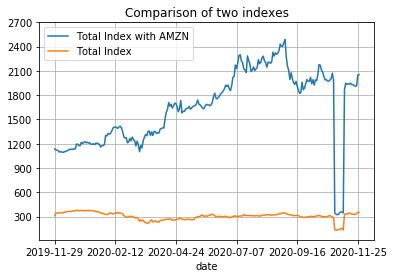

In [44]:
two_index_reserve.plot(x="date", y=["Total Index with AMZN", "Total Index"], kind="line", yticks=range(300, 3000, 300), 
                       grid=True, 
                       title="Comparison of two indexes")

In [ ]:
two_index.plot()

In [33]:
one_index = two_index_reserve[["date", "Total Index"]]
one_index

,date,Total Index
251,2019-11-29,310.629431
250,2019-12-02,341.439125
249,2019-12-03,341.029190
248,2019-12-04,347.726923
247,2019-12-05,344.761955
...,...,...
4,2020-11-20,325.059112
3,2020-11-23,327.002598
2,2020-11-24,337.283090
1,2020-11-25,352.839488


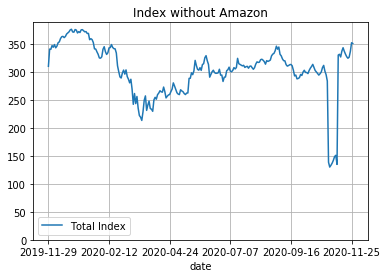

In [41]:
one_index.plot(x="date", y="Total Index", kind="line", yticks=range(0, 400, 50),
                       grid=True, 
                       title="Index without Amazon")

In [42]:
one_index['Total Index'].min()

130.20340624085148

In [36]:
one_index_AMZN = two_index_reserve[["date", "Total Index with AMZN"]]
one_index_AMZN

,date,Total Index with AMZN
251,2019-11-29,1135.518085
250,2019-12-02,1124.340674
249,2019-12-03,1119.407975
248,2019-12-04,1112.312236
247,2019-12-05,1095.736632
...,...,...
4,2020-11-20,1917.682156
3,2020-11-23,1907.968663
2,2020-11-24,1917.764602
1,2020-11-25,2049.113399


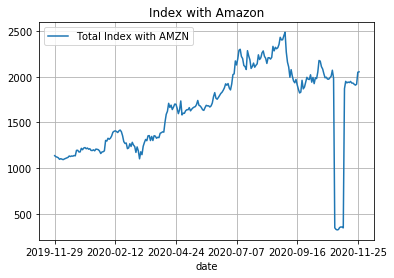

In [47]:
one_index_AMZN.plot(x="date", y="Total Index with AMZN", grid=True, title="Index with Amazon")

In [56]:
AMZN_price = pd.read_excel('Two index.xlsx')
AMZN_price

,date,Total Index with AMZN,Total Index,Amazon Price
0,2020-11-27,2053.754847,351.443333,3195.340088
1,2020-11-25,2049.113399,352.839488,3185.070068
2,2020-11-24,1917.764602,337.283090,3118.060059
3,2020-11-23,1907.968663,327.002598,3098.389893
4,2020-11-20,1917.682156,325.059112,3099.399902
...,...,...,...,...
247,2019-12-05,1095.736632,344.761955,1740.480000
248,2019-12-04,1112.312236,347.726923,1760.689900
249,2019-12-03,1119.407975,341.029190,1769.960000
250,2019-12-02,1124.340674,341.439125,1781.600000


In [59]:
AMZN_price = AMZN_price.sort_index(axis=0, ascending=False)
AMZN_price

,date,Total Index with AMZN,Total Index,Amazon Price
251,2019-11-29,1135.518085,310.629431,1800.800000
250,2019-12-02,1124.340674,341.439125,1781.600000
249,2019-12-03,1119.407975,341.029190,1769.960000
248,2019-12-04,1112.312236,347.726923,1760.689900
247,2019-12-05,1095.736632,344.761955,1740.480000
...,...,...,...,...
4,2020-11-20,1917.682156,325.059112,3099.399902
3,2020-11-23,1907.968663,327.002598,3098.389893
2,2020-11-24,1917.764602,337.283090,3118.060059
1,2020-11-25,2049.113399,352.839488,3185.070068


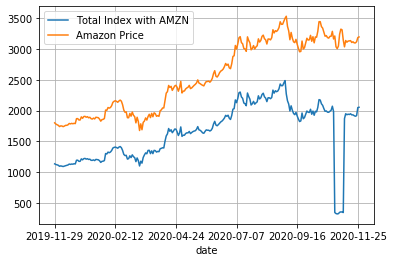

In [61]:
AMZN_price.plot(x="date", y=["Total Index with AMZN", "Amazon Price"], kind="line", grid=True)